<a href="https://colab.research.google.com/github/were007/Autolib-Dataset./blob/main/Hypothesis_testing_about_blue_cars_from_Autolib_in_Paris_Were_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

### a) **Specifying the Data Analytic Question: PROBLEM STATEMENT**
Investigate a claim about  the blue cars from the autilob dataset.

> Null hypothesis: the average number of blue cars taken is not different that of the blue cars returned


> Alternative hypothesis:  the average number of blue cars taken is different that of the blue cars returned(***CLAIM:***)








### b) **Defining the Metric for Success**


> The objectives for this data includes investigating the claim listed above and knowing whether or not the the average number of blue cars taken is different that of the blue cars returned


### c) **Understanding the context**

> Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

## d) Recording the Experimental Design

*   Defining the research question

*   Finding and dealing with outliers, anomalies, and missing data within the dataset.

*   Plot appropriate univariate and bivariate summaries recording our observations.

*   Implement the solution by performing hypothesis testing.
*  Challenge your solution by providing insights on how you can make improvements.
Defining the research question


## e) **Relevance of the data**

THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysis

# **DATA EXPLORATION**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

In [2]:
# reading in data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## Checking the data

In [4]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(9783, 13)
(16085, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [7]:
# determining the number of records in the dataset
df.shape

(16085, 13)

In [8]:
# checking for duplicates
df1.duplicated().any()

False

In [9]:
# checking for missing values
df1.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [10]:
df1.isnull().sum().sort_values(ascending=False)

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
df1.nunique()

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

# **EXPLORATORY ANALYSIS**

In [ ]:
# Rename columns
col_names = df1.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

df1.columns = col_names

In [ ]:
df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
df1.shape

(9783, 13)

In [ ]:
df1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [ ]:
df1.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
6955,92260,6,weekend,35,42
12825,93800,0,weekday,7,11
6395,92230,2,weekday,42,35
13659,94130,2,weekday,24,27
12567,93600,1,weekday,24,29
5962,92200,2,weekday,48,48
15344,94700,4,weekday,38,39
9873,92800,2,weekday,85,86
5236,92140,3,weekday,79,68
6060,92200,2,weekday,67,65


In [ ]:
# Extract day type data
df2 = df1[df1.day_type == 'weekend']

In [ ]:
df2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
13884,94140,5,weekend,103,89
7980,92340,6,weekend,32,26
8679,92380,5,weekend,17,20
13210,94100,6,weekend,8,6
8496,92370,6,weekend,34,23
6569,92240,6,weekend,116,140
5707,92170,6,weekend,71,77
14226,94220,5,weekend,72,69
14761,94340,5,weekend,57,57
5596,92160,6,weekend,47,37




*   Since the selection requires one set of data which is either weekends or weekdays, I chose to work with the wekends.






In [ ]:
df2.shape

(2963, 5)

In [ ]:
df2.nunique()

postal_code               79
dayofweek                  2
day_type                   1
bluecars_taken_sum       241
bluecars_returned_sum    234
dtype: int64

## Univariate analysis

In [ ]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: dayofweek, dtype: float64

*   From the dataset, the days of the week are coded with 5 being saturday and 6 being sunday

In [ ]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


Text(0.5, 1.0, 'distribution of blue cars taken')

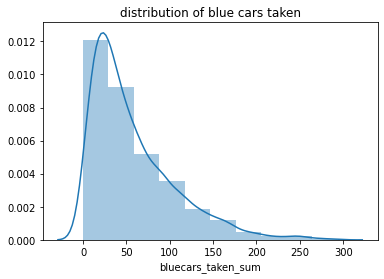

In [ ]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

Text(0.5, 1.0, 'distribution of blue cars returned')

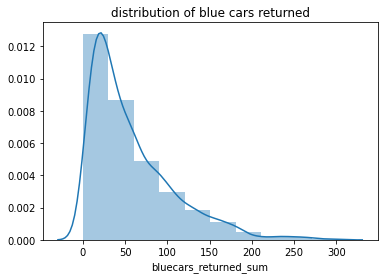

In [ ]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

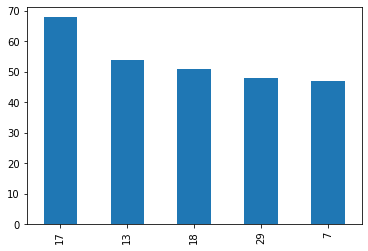

In [ ]:
df2['bluecars_returned_sum'].value_counts().head().plot.bar()

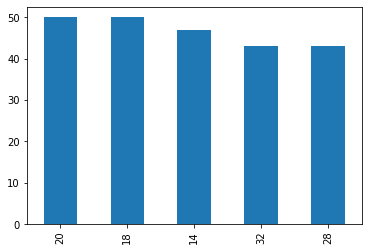

In [ ]:
df2['bluecars_taken_sum'].value_counts().head().plot.bar()

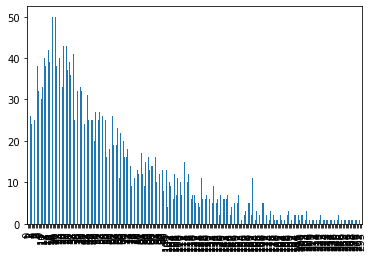

In [ ]:
df2['bluecars_taken_sum'].value_counts().sort_index().plot.bar()

In [ ]:
df2['postal_code'] = df2['postal_code'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['dayofweek'] = df2['dayofweek'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Bivariate analysis

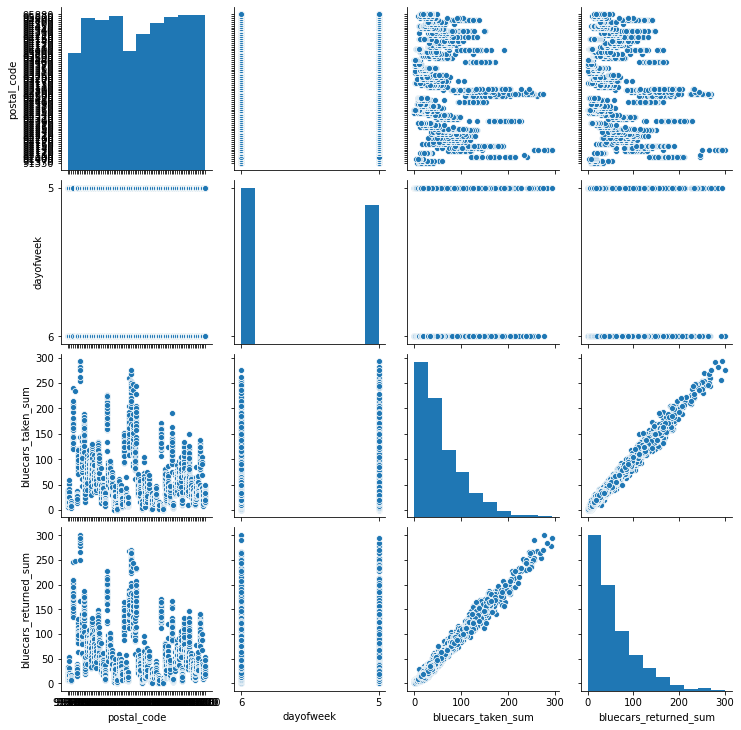

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

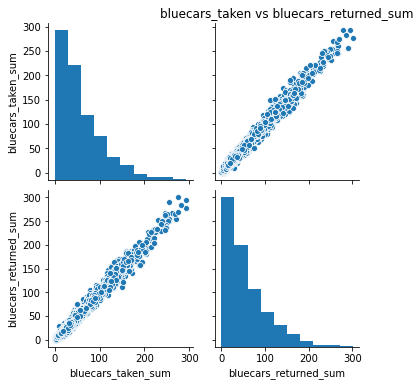

In [ ]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [ ]:
df2['bluecars_taken_sum'].corr(df2['bluecars_returned_sum'])

0.9906487464480561

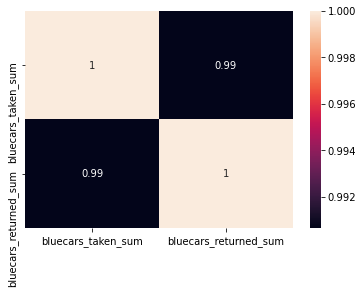

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

# **IMPLEMENTING THE SOLUTION**

## Hypothesis testing

In [ ]:
##  Null hypothesis: 
      # the average number of blue cars taken is not different that of the blue cars returned?
##  Alternative hypothesis:  
      # the average number of blue cars taken is different that of the blue cars returned(***CLAIM:***)

In [ ]:
df2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [ ]:
df2.dtypes

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [ ]:
df2.drop(['day_type'], axis=1, inplace=True)
df2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [ ]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [ ]:
# turning off warnings
warnings.filterwarnings('ignore')

In [ ]:
df2.count()

postal_code              2963
dayofweek                2963
bluecars_taken_sum       2963
bluecars_returned_sum    2963
dtype: int64

In [ ]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [ ]:
# shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

postal_code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




In [ ]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys  

# **stratified sampling**

In [ ]:
# Stratified sample
df4 = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
10672,93170,5,49,46
13416,94110,5,32,35
10651,93170,5,61,54
15762,95100,5,44,40
8605,92380,5,27,28
...,...,...,...,...
5870,92190,6,86,82
9933,92800,6,98,105
6271,92220,6,69,64
16023,95880,6,34,33


In [ ]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [ ]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [ ]:
# sample mean
b = df4['bluecars_taken_sum'].mean()
b

59.80067567567568

In [ ]:
e = df4['bluecars_returned_sum'].mean()
e

58.45608108108108

In [ ]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

50.23622974709518

In [ ]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.3163064830361377

In [ ]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.094035597889496

In [ ]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

66.12627489939426

In [ ]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(38.67676993633314, 80.92458141501822)


# **cluster sampling**

<function matplotlib.pyplot.show>

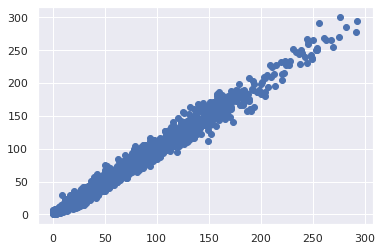

In [ ]:
# cluster sampling
plt.scatter(df2['bluecars_taken_sum'],df2['bluecars_returned_sum'])
plt.show

In [ ]:
x = df2.iloc[:, 2:4]
x

,bluecars_taken_sum,bluecars_returned_sum
3905,28,17
3911,24,21
3912,27,30
3918,16,10
3919,18,14
...,...,...
16068,36,33
16074,15,15
16075,34,32
16081,19,19


In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 34.27572202,  33.5916065 ],
       [127.26238286, 127.84872825]])

In [ ]:
kmeans.inertia_

4602334.500908243

In [ ]:
# Create a copy of the data
df3 = df2.copy()
# Create a new Series, containing the identified cluster for each observation
df3['Cluster'] = identified_clusters
# Check the result
df3

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,Cluster
3905,91330,6,28,17,0
3911,91330,5,24,21,0
3912,91330,6,27,30,0
3918,91330,5,16,10,0
3919,91330,6,18,14,0
...,...,...,...,...,...
16068,95880,6,36,33,0
16074,95880,5,15,15,0
16075,95880,6,34,32,0
16081,95880,5,19,19,0


In [ ]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df3)

array([[-1.7546114 ,  0.94578078, -0.60670759, -0.81372991, -0.58111747],
       [-1.7546114 , -1.05732747, -0.6883681 , -0.73307217, -0.58111747],
       [-1.7546114 ,  0.94578078, -0.62712271, -0.55159225, -0.58111747],
       ...,
       [ 2.72513968,  0.94578078, -0.48421681, -0.51126338, -0.58111747],
       [ 2.72513968, -1.05732747, -0.79044374, -0.77340104, -0.58111747],
       [ 2.72513968,  0.94578078, -0.50463194, -0.45077007, -0.58111747]])

In [ ]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(df3,2)
gmm = pd.DataFrame(clust_labels3)
df3.insert((df3.shape[1]),'gmm',gmm)

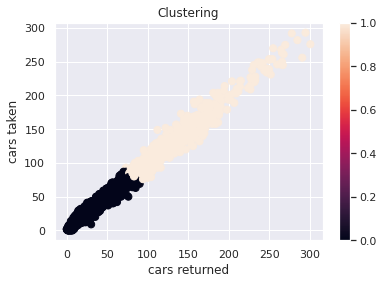

In [ ]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df3['bluecars_returned_sum'],df3['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)

# **CONCLUSION**



> We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.

